# ARIMAX and SARIMAX

### 1. White noise

## Definition

A **white noise process** $(\{u_t\})$ is a sequence of random variables satisfying:

1. **Zero Mean**  
   $$
   \mathbb{E}[u_t] = 0
   $$

2. **Constant Variance (Homoskedasticity)**  
   $$
   \mathbb{E}[u_t^2] = \sigma^2 < \infty
   $$

3. **No Serial Correlation (Uncorrelatedness)**  
   $$
   \mathbb{E}[u_t u_s] = 0 \quad \text{for } t \neq s
   $$
---
- **Model Diagnostics**  
  Residuals from a correctly specified model should behave like white noise. If they don't, the model is likely misspecified.

- **Innovation Processes in Time Series**  
  In ARMA models:
  $$
    X_t = \phi X_{t-1} + u_t + \theta u_{t-1}, \quad u_t \sim \text{white noise}
  $$
---


**Two cases:**

1. Residuals are autocorrelated (i.e., contain time dependence):

Then ARIMA is not capturing the full dynamics. You might:

Add AR or MA lags (i.e., adjust ARIMA orders)

Or include exogenous variables (X) — leading to ARIMAX

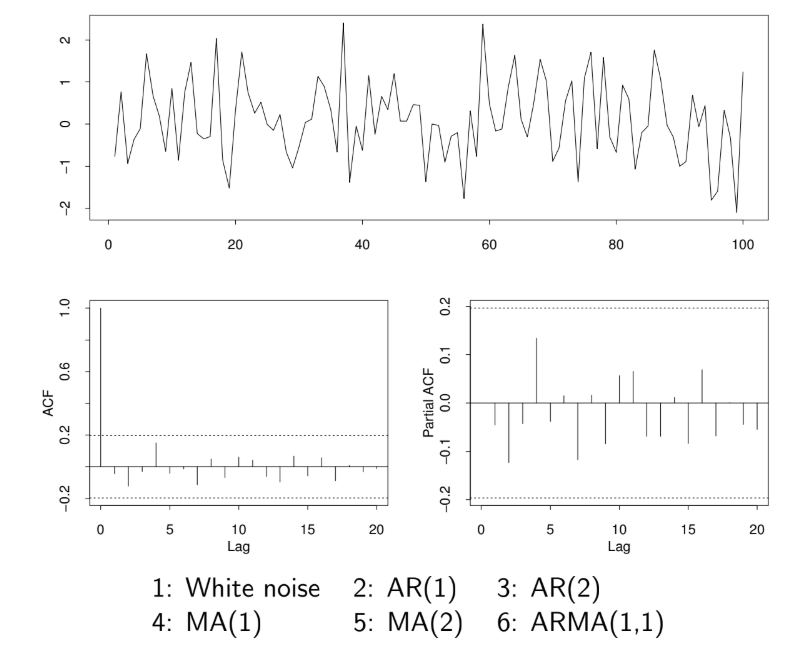

In [10]:
from IPython.display import Image, display
display(Image("C:/Users/Brahim/APCF/WN.png"))

2. Residuals have nonstationary variance (heteroskedasticity):

You need to model the volatility of the residuals — using GARCH or similar models

## 2. Check previous models

## 3. Introduction to ARIMAX:

An Autoregressive Integrated Moving Average with Explanatory variable (ARIMAX) model is basically an ARIMA model with one or more explanatory/independent variables also known as Exogenous variables.

**Parameters in ARIMAX**

There are basically 3 parameters in an ARIMAX model: p,d,q

In PACF plot, the number of spikes, above a certain reference line, decide the value of p. <br>
In ACF plot, the number of spikes, above a certain reference line, decide the value of q.  <br>
 
For example:  <br>
ARIMAX(2,1,1) means that we have a second order autoregressive model with first order moving average component and the series has been differenced once to make it stationary.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
from datetime import datetime

%matplotlib inline

**Read the dataset from Github**

In [81]:
url = "https://raw.githubusercontent.com/brahzr/Time-series-Analysis/refs/heads/main/salesdata2.csv"
df = pd.read_csv(url)

print(df.head())
print(df.tail())

     Month   Marketing       Sales
0  2005-01  107.284347  123.819229
1  2005-02  214.523447  267.318463
2  2005-03  327.159934  482.107206
3  2005-04  437.384597  762.756909
4  2005-05  518.389038  997.734857
      Month    Marketing         Sales
70  2010-11  7589.918654   8529.339522
71  2010-12  7771.809813  16866.334210
72  2011-01  7840.068364  14860.740490
73  2011-02  8022.535129  13465.360330
74  2011-03  7809.123841   8801.807069


**Simple EDA**

In [82]:
#check missing values
df.isnull().sum()

Month        0
Marketing    0
Sales        0
dtype: int64

In [83]:
#check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      75 non-null     object 
 1   Marketing  75 non-null     float64
 2   Sales      75 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [84]:
#change Month to datetime
df["Month"] = pd.to_datetime(df["Month"])

In [85]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      75 non-null     datetime64[ns]
 1   Marketing  75 non-null     float64       
 2   Sales      75 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.9 KB
None
       Month   Marketing       Sales
0 2005-01-01  107.284347  123.819229
1 2005-02-01  214.523447  267.318463
2 2005-03-01  327.159934  482.107206
3 2005-04-01  437.384597  762.756909
4 2005-05-01  518.389038  997.734857


In [86]:
#change Month to index
df.set_index("Month",inplace=True)
print(df.head())

             Marketing       Sales
Month                             
2005-01-01  107.284347  123.819229
2005-02-01  214.523447  267.318463
2005-03-01  327.159934  482.107206
2005-04-01  437.384597  762.756909
2005-05-01  518.389038  997.734857


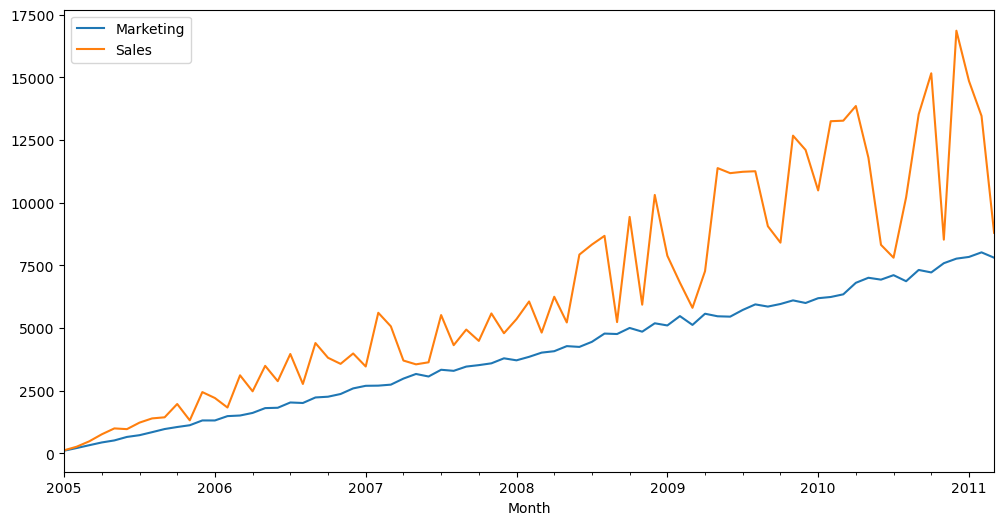

In [87]:
#Plotting the variables to check if the data is stationary
df[["Marketing","Sales"]].plot(figsize = (12,6))
plt.show()

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

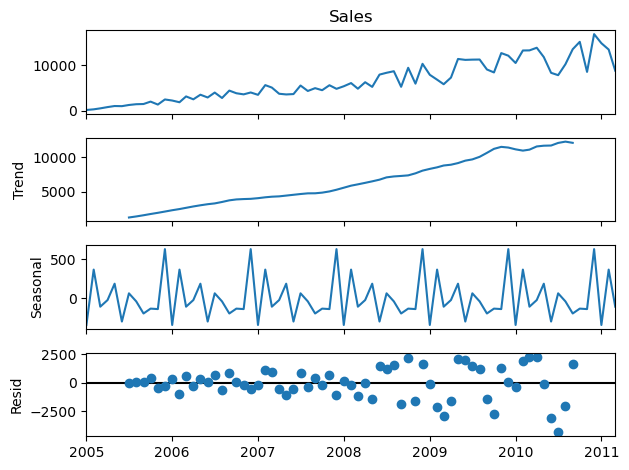

In [89]:
comp = seasonal_decompose(df["Sales"], model ="additive", period = 12)
comp.plot()
plt.show()

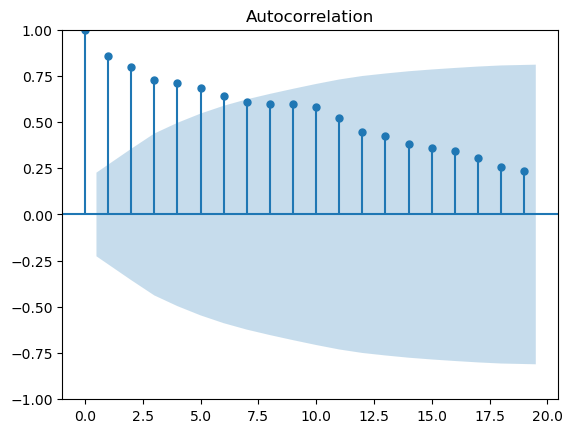

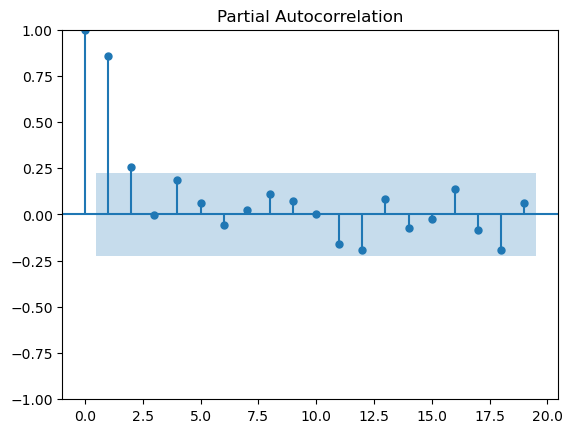

In [92]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df["Sales"])
pacf = plot_pacf(df["Sales"])

**Stationary Analysis**

In [93]:
from statsmodels.tsa.stattools import adfuller

In [94]:
def adf_test(series):
    result = adfuller(series)
    print(result)
    print("ADF Statistics: {}".format(result[0]))
    print("p- value: {}".format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [95]:
#sales
adf_test(df["Sales"])

(np.float64(-0.3515085956133367), np.float64(0.9178857333016116), 11, 63, {'1%': np.float64(-3.5386953618719676), '5%': np.float64(-2.9086446751210775), '10%': np.float64(-2.591896782564878)}, np.float64(1117.90900160784))
ADF Statistics: -0.3515085956133367
p- value: 0.9178857333016116
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [96]:
#marketing
adf_test(df["Marketing"])

(np.float64(0.11973556845672911), np.float64(0.967382986900224), 1, 73, {'1%': np.float64(-3.5232835753964475), '5%': np.float64(-2.902030597326081), '10%': np.float64(-2.5883710883843123)}, np.float64(788.4679673726595))
ADF Statistics: 0.11973556845672911
p- value: 0.967382986900224
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [97]:
## Use Techniques Differencing for both series
df["Sales First Diff"]= df["Sales"]-df["Sales"].shift(1)
df["Marketing First Diff"]= df["Marketing"]-df["Marketing"].shift(1)
print(df.head())

             Marketing       Sales  Sales First Diff  Marketing First Diff
Month                                                                     
2005-01-01  107.284347  123.819229               NaN                   NaN
2005-02-01  214.523447  267.318463        143.499234            107.239100
2005-03-01  327.159934  482.107206        214.788743            112.636487
2005-04-01  437.384597  762.756909        280.649703            110.224663
2005-05-01  518.389038  997.734857        234.977948             81.004442


In [98]:
#check stationary for sales
adf_test(df["Sales First Diff"].dropna())

(np.float64(-2.723169129562987), np.float64(0.0701140907877718), 10, 63, {'1%': np.float64(-3.5386953618719676), '5%': np.float64(-2.9086446751210775), '10%': np.float64(-2.591896782564878)}, np.float64(1099.1968501252554))
ADF Statistics: -2.723169129562987
p- value: 0.0701140907877718
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [99]:
#second order for sales
df["Sales Second Diff"]= df["Sales First Diff"]-df["Sales First Diff"].shift(1)
adf_test(df["Sales Second Diff"].dropna())

(np.float64(-5.233880450824633), np.float64(7.494618603323256e-06), 12, 60, {'1%': np.float64(-3.5443688564814813), '5%': np.float64(-2.9110731481481484), '10%': np.float64(-2.5931902777777776)}, np.float64(1087.8275705049596))
ADF Statistics: -5.233880450824633
p- value: 7.494618603323256e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [100]:
#check stationary for marketing
adf_test(df["Marketing First Diff"].dropna())

(np.float64(-17.04487398081549), np.float64(8.147271072203603e-30), 0, 73, {'1%': np.float64(-3.5232835753964475), '5%': np.float64(-2.902030597326081), '10%': np.float64(-2.5883710883843123)}, np.float64(774.8468351152555))
ADF Statistics: -17.04487398081549
p- value: 8.147271072203603e-30
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Summary: <br>
-Sales is I2 <br>
-Marketing is I1

**ACF and PACF ARIMA**

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

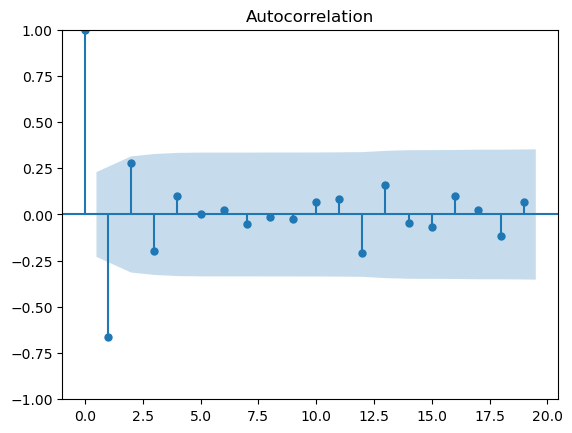

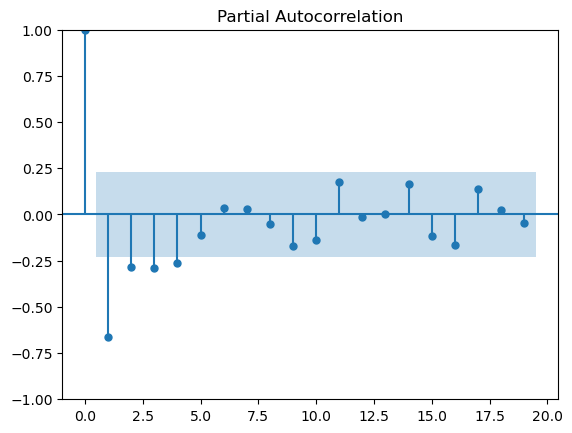

In [102]:
acf = plot_acf(df["Sales Second Diff"].dropna())
pacf = plot_pacf(df["Sales Second Diff"].dropna())

$$**ARIMA(4,2,1)**$$

**Split and Train**

In [31]:
df

,Marketing,Sales,Sales First Diff,Marketing First Diff,Sales Second Diff
Month,,,,,
2005-01-01,107.284347,123.819229,NaN,NaN,NaN
2005-02-01,214.523447,267.318463,143.499234,107.239100,NaN
2005-03-01,327.159934,482.107206,214.788743,112.636487,71.289509
2005-04-01,437.384597,762.756909,280.649703,110.224663,65.860960
2005-05-01,518.389038,997.734857,234.977948,81.004442,-45.671755
...,...,...,...,...,...
2010-11-01,7589.918654,8529.339522,-6638.392258,368.549327,-8274.119158
2010-12-01,7771.809813,16866.334210,8336.994688,181.891159,14975.386946
2011-01-01,7840.068364,14860.740490,-2005.593720,68.258551,-10342.588408


In [32]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2008,8,1)
test_dataset_end=datetime(2011,3,1)

In [103]:
train_data=df[:train_dataset_end] 
test_data=df[train_dataset_end+timedelta(1):test_dataset_end]

In [104]:
print(train_data)
print(test_data)

              Marketing        Sales  Sales First Diff  Marketing First Diff  \
Month                                                                          
2005-01-01   107.284347   123.819229               NaN                   NaN   
2005-02-01   214.523447   267.318463        143.499234            107.239100   
2005-03-01   327.159934   482.107206        214.788743            112.636487   
2005-04-01   437.384597   762.756909        280.649703            110.224663   
2005-05-01   518.389038   997.734857        234.977948             81.004442   
2005-06-01   657.617312   968.322453        -29.412404            139.228274   
2005-07-01   727.253623  1228.443301        260.120848             69.636311   
2005-08-01   847.472727  1396.419992        167.976691            120.219104   
2005-09-01   972.358451  1440.872584         44.452592            124.885724   
2005-10-01  1053.528271  1971.237443        530.364859             81.169820   
2005-11-01  1124.267276  1319.674162    

In [35]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [105]:
print(pred_start_date)
print(pred_end_date)

2008-09-01 00:00:00
2011-03-01 00:00:00


**ARIMA Modelling**

In [106]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [107]:
model_ARIMA = ARIMA(train_data["Sales"],order=(4,2,1))

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [108]:
model_Arima_fit=model_ARIMA.fit()

In [109]:
print(model_Arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   44
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -336.159
Date:                Mon, 20 Oct 2025   AIC                            684.317
Time:                        20:28:48   BIC                            694.743
Sample:                    01-01-2005   HQIC                           688.139
                         - 08-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9429      0.243     -3.878      0.000      -1.419      -0.466
ar.L2         -0.6010      0.296     -2.033      0.042      -1.180      -0.022
ar.L3         -0.7192      0.235     -3.057      0.0

**prediction**

In [111]:
pred=model_Arima_fit.predict(start=pred_start_date,end= pred_end_date)
residuals=test_data["Sales"]-pred #Y - Y_hat

In [112]:
table = pd.DataFrame({"Test Data": test_data["Sales"],
"Prediction": pred,
"Residuals": residuals})

print(table.head(10))
print(table.tail(10))

               Test Data    Prediction    Residuals
2008-09-01   5240.208212   8620.857653 -3380.649441
2008-10-01   9437.625808   8646.979392   790.646416
2008-11-01   5934.645757  10103.893434 -4169.247677
2008-12-01  10313.222620  10481.772640  -168.550020
2009-01-01   7888.457300  11171.938497 -3283.481197
2009-02-01   6814.263144  11141.170930 -4326.907786
2009-03-01   5809.291269  11616.313285 -5807.022016
2009-04-01   7272.624055  12397.907100 -5125.283045
2009-05-01  11384.458810  12938.623466 -1554.164656
2009-06-01  11183.108990  13542.499451 -2359.390461
               Test Data    Prediction     Residuals
2010-06-01   8322.647692  19377.902745 -11055.255053
2010-07-01   7809.348816  19881.796081 -12072.447265
2010-08-01  10219.997890  20423.397734 -10203.399844
2010-09-01  13532.004880  20913.822716  -7381.817836
2010-10-01  15167.731780  21407.707435  -6239.975655
2010-11-01   8529.339522  21898.121499 -13368.781977
2010-12-01  16866.334210  22406.445883  -5540.111673
2011

**Residuals Diagnostics**

<Axes: xlabel='Month'>

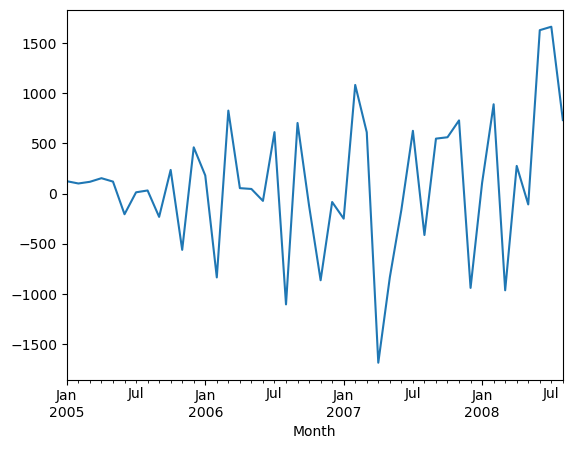

In [113]:
model_Arima_fit.resid.plot()

<Axes: ylabel='Density'>

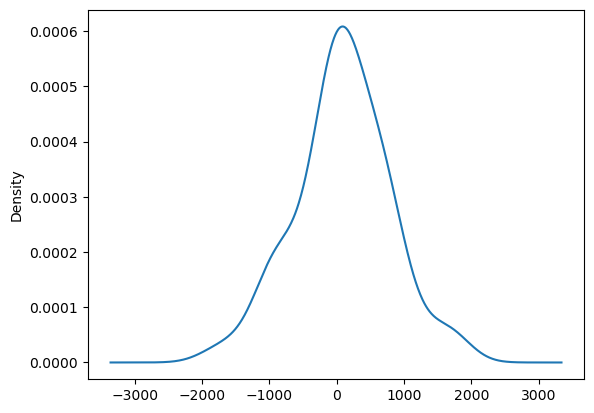

In [114]:
model_Arima_fit.resid.plot(kind = "kde")

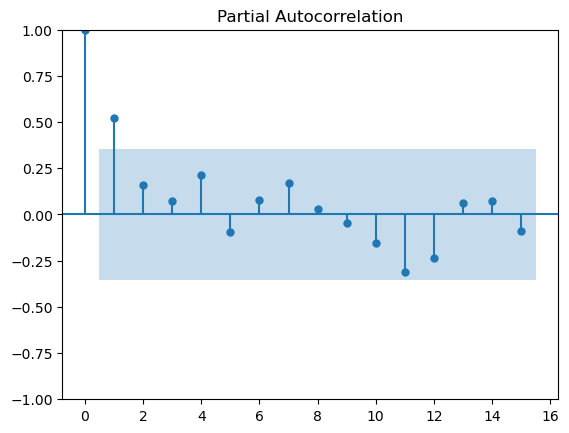

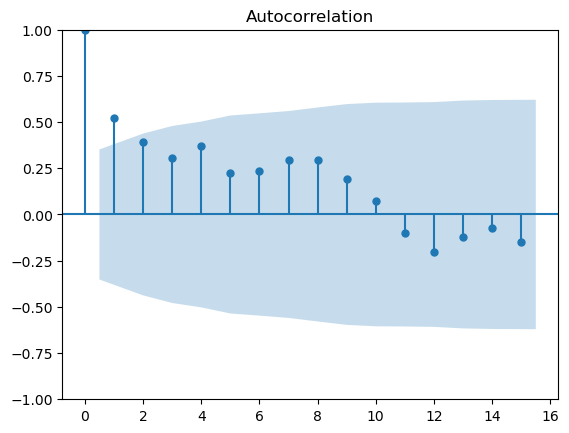

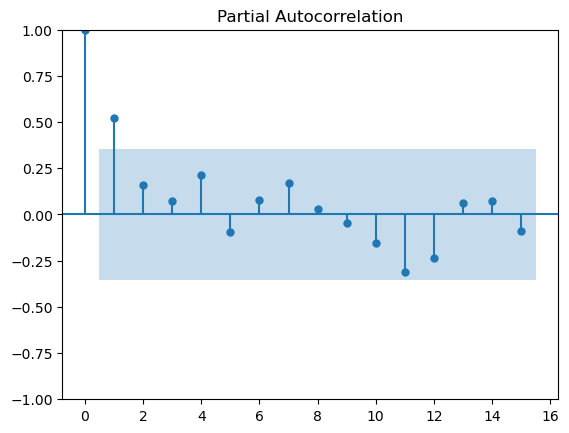

In [115]:
plot_acf(residuals)
plot_pacf(residuals)

In [116]:
test_data["Predicted_ARIMA"]= pred
test_data.head()

C:\Users\Brahim\AppData\Local\Temp\ipykernel_6344\1255057182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predicted_ARIMA"]= pred


,Marketing,Sales,Sales First Diff,Marketing First Diff,Sales Second Diff,Predicted_ARIMA
Month,,,,,,
2008-09-01,4763.921441,5240.208212,-3440.862088,-17.790426,-3787.690971,8620.857653
2008-10-01,5006.112454,9437.625808,4197.417596,242.191013,7638.279684,8646.979392
2008-11-01,4857.573501,5934.645757,-3502.980051,-148.538953,-7700.397647,10103.893434
2008-12-01,5192.311939,10313.222620,4378.576863,334.738438,7881.556914,10481.772640
2009-01-01,5106.195857,7888.457300,-2424.765320,-86.116082,-6803.342183,11171.938497


<Axes: xlabel='Month'>

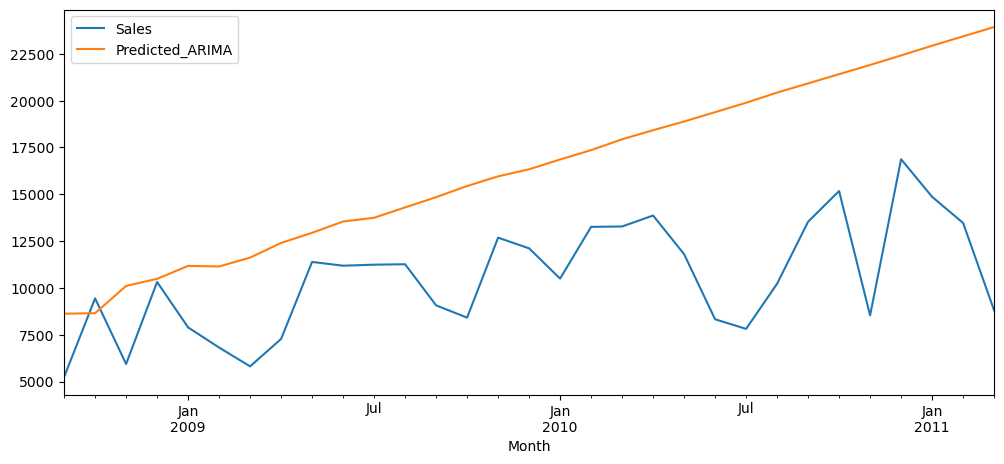

In [117]:
test_data[["Sales","Predicted_ARIMA"]].plot(figsize = (12,5))

**Validation of ARIMA**

In [118]:
from sklearn.metrics import mean_squared_error
mse_test_Arima  = mean_squared_error(test_data["Sales"], pred)
print("Training MSE:", round(mse_test_Arima,3))

Training MSE: 47459462.973


In [49]:
df

,Marketing,Sales,Sales First Diff,Marketing First Diff,Sales Second Diff
Month,,,,,
2005-01-01,107.284347,123.819229,NaN,NaN,NaN
2005-02-01,214.523447,267.318463,143.499234,107.239100,NaN
2005-03-01,327.159934,482.107206,214.788743,112.636487,71.289509
2005-04-01,437.384597,762.756909,280.649703,110.224663,65.860960
2005-05-01,518.389038,997.734857,234.977948,81.004442,-45.671755
...,...,...,...,...,...
2010-11-01,7589.918654,8529.339522,-6638.392258,368.549327,-8274.119158
2010-12-01,7771.809813,16866.334210,8336.994688,181.891159,14975.386946
2011-01-01,7840.068364,14860.740490,-2005.593720,68.258551,-10342.588408


In [ ]:
ARIMA( data, order(p,I,q), exog = X)

In [119]:
model_ARIMAX = ARIMA(
    train_data["Sales"].iloc[1:], 
    order=(4, 2, 1), 
    exog=train_data["Marketing First Diff"].dropna()
)

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [120]:
model_Arimax_fit=model_ARIMAX.fit()

C:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [121]:
print(model_Arimax_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   43
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -328.509
Date:                Mon, 20 Oct 2025   AIC                            671.017
Time:                        20:45:47   BIC                            683.012
Sample:                    02-01-2005   HQIC                           675.385
                         - 08-01-2008                                         
Covariance Type:                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Marketing First Diff    -0.6529      1.125     -0.580      0.562      -2.858       1.552
ar.L1                   -1.0009      0.261     -3.835      0.000      -1.513      -0.489
ar.L2       

**prediction**

In [53]:
test_data.head()
test_data.tail()

,Marketing,Sales,Sales First Diff,Marketing First Diff,Sales Second Diff,Predicted_ARIMA
Month,,,,,,
2010-11-01,7589.918654,8529.339522,-6638.392258,368.549327,-8274.119158,14029.999742
2010-12-01,7771.809813,16866.334210,8336.994688,181.891159,14975.386946,14227.682195
2011-01-01,7840.068364,14860.740490,-2005.593720,68.258551,-10342.588408,14426.185784
2011-02-01,8022.535129,13465.360330,-1395.380160,182.466765,610.213560,14623.988049
2011-03-01,7809.123841,8801.807069,-4663.553261,-213.411288,-3268.173101,14822.345871


In [122]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [123]:
exog_test = test_data["Marketing First Diff"]
pred = model_Arimax_fit.predict(
    start=pred_start_date,
    end=pred_end_date,
    exog=exog_test
)

In [124]:
res = test_data["Sales"]-pred

In [125]:
table = pd.DataFrame({"Test Data": test_data["Sales"],
"Prediction": pred,
"Residuals": res})

print(table.head(10))
print(table.tail(10))

               Test Data    Prediction    Residuals
2008-09-01   5240.208212   8989.888018 -3749.679806
2008-10-01   9437.625808   8885.749466   551.876342
2008-11-01   5934.645757  10644.065351 -4709.419594
2008-12-01  10313.222620  10730.375559  -417.152939
2009-01-01   7888.457300  11799.777722 -3911.320422
2009-02-01   6814.263144  11543.355968 -4729.092824
2009-03-01   5809.291269  12584.143936 -6774.852667
2009-04-01   7272.624055  12901.707819 -5629.083764
2009-05-01  11384.458810  13834.327743 -2449.868933
2009-06-01  11183.108990  14470.025565 -3286.916575
               Test Data    Prediction     Residuals
2010-06-01   8322.647692  21171.369202 -12848.721510
2010-07-01   7809.348816  21575.019277 -13765.670461
2010-08-01  10219.997890  22463.538122 -12243.540232
2010-09-01  13532.004880  22558.035057  -9026.030177
2010-10-01  15167.731780  23487.142907  -8319.411127
2010-11-01   8529.339522  23739.153718 -15209.814196
2010-12-01  16866.334210  24441.825016  -7575.490806
2011

**Residuals Diagnostics**

<Axes: xlabel='Month'>

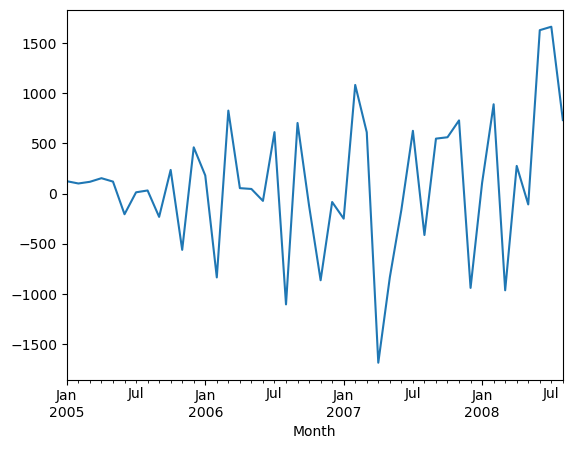

In [126]:
model_Arima_fit.resid.plot()

<Axes: ylabel='Density'>

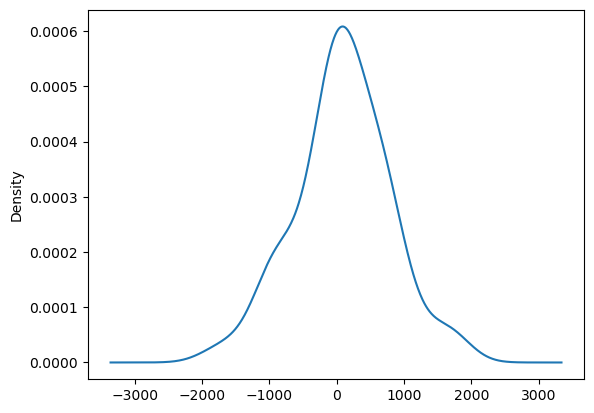

In [127]:
model_Arima_fit.resid.plot(kind = "kde")

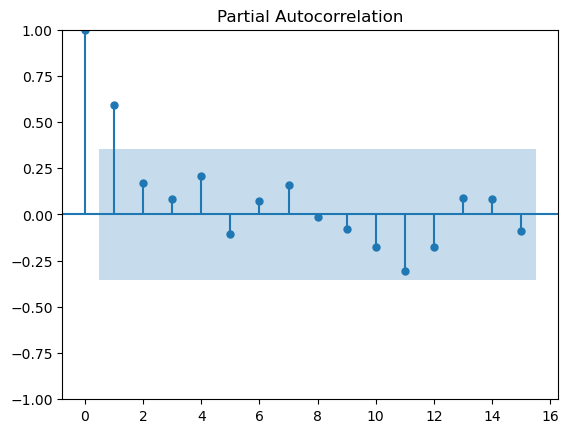

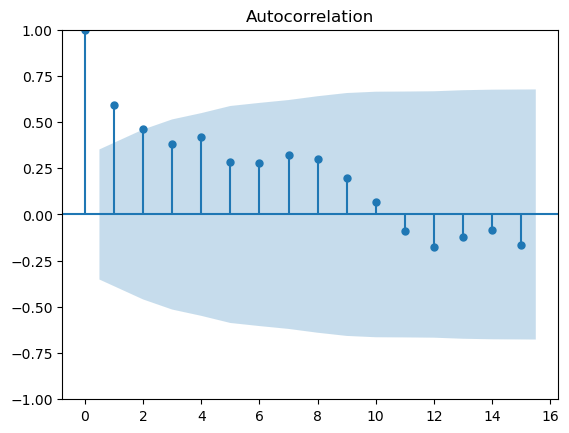

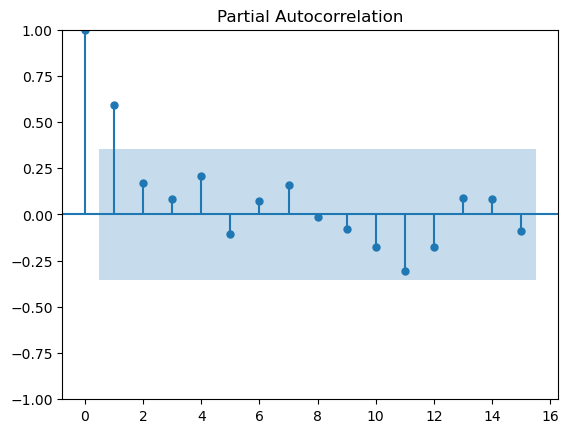

In [129]:
plot_acf(res)
plot_pacf(res)

C:\Users\Brahim\AppData\Local\Temp\ipykernel_6344\2135056740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predicted_ARIMAX"]= pred


<Axes: xlabel='Month'>

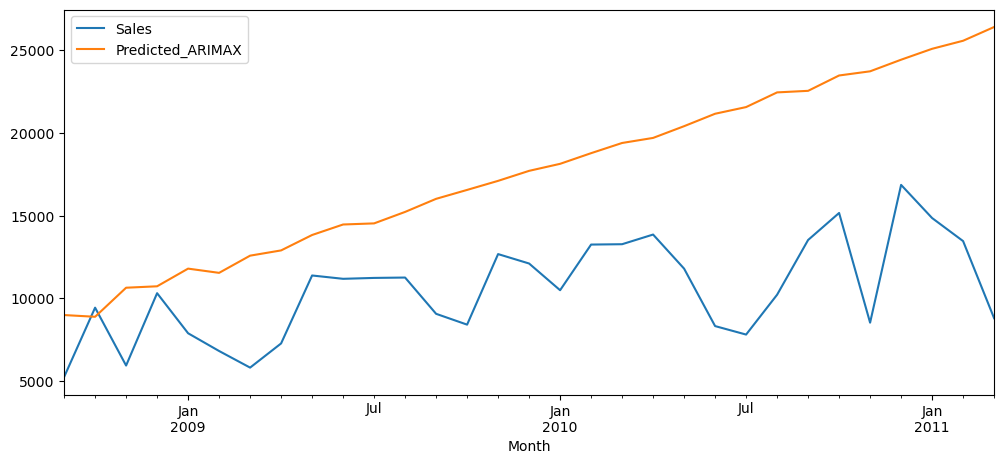

In [130]:
test_data["Predicted_ARIMAX"]= pred
test_data[["Sales","Predicted_ARIMAX"]].plot(figsize = (12,5))

**Validation of ARIMAX**

In [131]:
from sklearn.metrics import mean_squared_error
mse_test_Arimax  = mean_squared_error(test_data["Sales"], pred)
print("Training MSE:", round(mse_test_Arimax,3))

Training MSE: 67825903.846


**SARIMAX**

In [67]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_SARIMAX = SARIMAX(
    train_data["Sales"].iloc[1:],
    order=(1, 2, 1),
    seasonal_order=(1, 1, 1, 12),  # example seasonal structure
    exog=train_data["Marketing First Diff"].dropna()
)
model_SARIMAX_fit = model_SARIMAX.fit()

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [76]:
model_SARIMA_fit=model_SARIMAX.fit()

C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [77]:
print(model_SARIMAX_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   43
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 12)   Log Likelihood                -241.381
Date:                            Mon, 20 Oct 2025   AIC                            494.762
Time:                                    15:21:38   BIC                            502.966
Sample:                                02-01-2005   HQIC                           497.331
                                     - 08-01-2008                                         
Covariance Type:                              opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Marketing First Diff    -1.9582      1.438     -1.362      0.173      -4.777       0.860
ar.L1